## Load and prepare datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Load the datasets back from CSV files

period_names = ['2011_2014', '2021_2030', '2031_2040', '2041_2050']
loaded_datasets = {}

for period_name in period_names:
    loaded_datasets[period_name] = pd.read_csv(f"datasets/climate_features_{period_name}_future.csv").sort_values(by='city').reset_index(drop=True)
    print(f"Loaded climate_features_{period_name}_future.csv with shape {loaded_datasets[period_name].shape}")

Loaded climate_features_2011_2014_future.csv with shape (56, 27)
Loaded climate_features_2021_2030_future.csv with shape (56, 27)
Loaded climate_features_2031_2040_future.csv with shape (56, 27)
Loaded climate_features_2041_2050_future.csv with shape (56, 27)


In [52]:
def get_metadata(df):
    return df[['city', 'latitude', 'longitude']]

def get_climate_features(df):
    return df.drop(columns=['city', 'latitude', 'longitude'])

In [53]:
datasets = {}

for period_name in period_names:
    datasets[period_name] = get_climate_features(loaded_datasets[period_name])

In [54]:
display(datasets['2021_2030'].head())

,tp_winter,tp_spring,tp_summer,tp_autumn,sf_winter,sf_spring,sf_summer,sf_autumn,si10_winter,si10_spring,...,t2m_summer,t2m_autumn,max_t2m_winter,max_t2m_spring,max_t2m_summer,max_t2m_autumn,min_t2m_winter,min_t2m_spring,min_t2m_summer,min_t2m_autumn
0,0.002671,0.002668,0.002651,0.002610,0.000060,0.000049,0.000048,0.000048,4.473306,4.447466,...,283.79163,283.65024,287.06467,287.12164,287.41763,287.24250,279.68335,279.68585,279.93658,279.84740
1,0.002316,0.002333,0.002315,0.002277,0.000501,0.000479,0.000466,0.000467,1.626167,1.607465,...,283.12180,282.93103,287.73325,287.86963,288.24277,288.02980,277.73800,277.76514,278.06638,277.91605
2,0.001271,0.001271,0.001206,0.001208,0.000236,0.000226,0.000218,0.000223,2.231605,2.249003,...,284.26180,283.99190,289.90903,290.24554,290.62482,290.34406,277.45557,277.62823,277.88702,277.64484
3,0.001329,0.001230,0.001194,0.001215,0.000019,0.000020,0.000020,0.000020,2.557148,2.550407,...,290.52588,290.32037,294.75674,294.90222,295.24445,295.03717,285.58905,285.65576,285.93826,285.74817
4,0.002077,0.002114,0.002120,0.002077,0.000200,0.000197,0.000194,0.000194,2.629093,2.650955,...,286.52658,286.23926,290.55203,290.79593,291.16860,290.83896,281.54178,281.67110,281.97120,281.73820


## Features variance

In [55]:
def calculate_feature_statistics(df):
    stats = {}
    for column in df.columns:
        stats[column] = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'variance': df[column].var()
        }
    result = pd.DataFrame(stats).T
    
    # Formater toutes les colonnes numériques
    return result.style.format('{:.10f}')

In [56]:
stat_2030 = calculate_feature_statistics(datasets['2021_2030'])
stat_2020 = calculate_feature_statistics(datasets['2011_2014'])
mean = pd.concat([stat_2020.data['mean'], stat_2030.data['mean']], axis=1)
mean.columns = ['2011_2014_mean', '2021_2030_mean']
mean['mean_change'] = mean['2021_2030_mean'] - mean['2011_2014_mean']
display(mean.sort_index().style.format('{:.10f}'))

,2011_2014_mean,2021_2030_mean,mean_change
max_t2m_autumn,288.6336717857,288.4358403571,-0.1978314286
max_t2m_spring,288.4469432143,288.3457055357,-0.1012376786
max_t2m_summer,289.2896916071,288.6751060714,-0.6145855357
max_t2m_winter,288.0125648214,288.2011571429,0.1885923214
min_t2m_autumn,280.5779166071,280.3779903571,-0.1999262500
min_t2m_spring,280.2878407143,280.2694687500,-0.0183719643
min_t2m_summer,281.0494430357,280.5448183929,-0.5046246429
min_t2m_winter,280.1093237500,280.2033850000,0.0940612500
sf_autumn,0.0002538400,0.0002868730,0.0000330330
sf_spring,0.0002704540,0.0002920500,0.0000215960


## Remove highly correlated features

In [57]:
def display_correlation_matrix(df):
    display(df.corr())

In [58]:
display_correlation_matrix(datasets['2021_2030'])

,tp_winter,tp_spring,tp_summer,tp_autumn,sf_winter,sf_spring,sf_summer,sf_autumn,si10_winter,si10_spring,...,t2m_summer,t2m_autumn,max_t2m_winter,max_t2m_spring,max_t2m_summer,max_t2m_autumn,min_t2m_winter,min_t2m_spring,min_t2m_summer,min_t2m_autumn
tp_winter,1.000000,0.998753,0.998099,0.998851,0.538085,0.532816,0.532129,0.531034,0.099570,0.099005,...,-0.297543,-0.288892,-0.344457,-0.350271,-0.353555,-0.346435,-0.176389,-0.179284,-0.181720,-0.174450
tp_spring,0.998753,1.000000,0.999518,0.999127,0.539832,0.535417,0.534484,0.533147,0.089461,0.089018,...,-0.305697,-0.297234,-0.348925,-0.354533,-0.357716,-0.350853,-0.187824,-0.190593,-0.193044,-0.185818
tp_summer,0.998099,0.999518,1.000000,0.999058,0.551102,0.546587,0.545795,0.544405,0.089132,0.088725,...,-0.319634,-0.311368,-0.362546,-0.368019,-0.371158,-0.364582,-0.200879,-0.203766,-0.206170,-0.199016
tp_autumn,0.998851,0.999127,0.999058,1.000000,0.536370,0.531439,0.530800,0.529506,0.094313,0.093825,...,-0.299335,-0.290913,-0.345334,-0.351137,-0.354396,-0.347562,-0.179090,-0.182061,-0.184454,-0.177293
sf_winter,0.538085,0.539832,0.551102,0.536370,1.000000,0.999021,0.999256,0.999435,-0.268006,-0.269727,...,-0.628504,-0.632062,-0.564795,-0.556467,-0.553499,-0.559328,-0.634764,-0.631165,-0.630211,-0.631125
sf_spring,0.532816,0.535417,0.546587,0.531439,0.999021,1.000000,0.999843,0.999694,-0.273809,-0.275426,...,-0.621606,-0.625398,-0.557208,-0.548757,-0.545662,-0.551709,-0.630385,-0.626794,-0.625743,-0.626835
sf_summer,0.532129,0.534484,0.545795,0.530800,0.999256,0.999843,1.000000,0.999913,-0.270437,-0.272074,...,-0.622993,-0.626740,-0.559337,-0.550967,-0.547919,-0.553924,-0.630584,-0.627085,-0.626057,-0.627112
sf_autumn,0.531034,0.533147,0.544405,0.529506,0.999435,0.999694,0.999913,1.000000,-0.273004,-0.274647,...,-0.621459,-0.625218,-0.557229,-0.548779,-0.545739,-0.551733,-0.629851,-0.626227,-0.625202,-0.626290
si10_winter,0.099570,0.089461,0.089132,0.094313,-0.268006,-0.273809,-0.270437,-0.273004,1.000000,0.999959,...,-0.157863,-0.140270,-0.370681,-0.386096,-0.394910,-0.379028,0.146183,0.133447,0.127626,0.140988
si10_spring,0.099005,0.089018,0.088725,0.093825,-0.269727,-0.275426,-0.272074,-0.274647,0.999959,1.000000,...,-0.156181,-0.138628,-0.368979,-0.384344,-0.393164,-0.377317,0.147525,0.134822,0.128998,0.142324


In [59]:
def remove_highly_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    reduced_df = df.drop(columns=to_drop)

    print(f"Removed {len(to_drop)} features due to high correlation (> {threshold})")
    print("Features removed:", to_drop)
    print("Features retained:", reduced_df.columns.tolist())
    print("New shape of the dataset:", reduced_df.shape)

    plt.figure(figsize=(7,3))
    sns.heatmap(reduced_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix after Removing Highly Correlated Features")
    plt.show()

    return reduced_df

def retrieve_low_correlation_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [column for column in upper_triangle.columns if upper_triangle[column].dropna().le(threshold).all()]

    print(f"Retained {len(to_keep)} features with low correlation (<= {threshold})")
    print("Features retained:", to_keep)

    if len(to_keep) > 0:
        print("Number of features retained:", len(to_keep))
    else:
        print("No features found with all correlations <= threshold.")

    return to_keep

def remove_features_from_df(df, features_to_keep):
    reduced_df = df[features_to_keep]
    print("New shape of the dataset after removing features:", reduced_df.shape)
    return reduced_df  

    
    

In [60]:
# Put each dataset under each other
fused_ds = pd.DataFrame()

for period_name in period_names:
    fused_ds = pd.concat([fused_ds, datasets[period_name]], ignore_index=True)

display(fused_ds.shape)

(224, 24)

In [61]:
display(fused_ds)

,tp_winter,tp_spring,tp_summer,tp_autumn,sf_winter,sf_spring,sf_summer,sf_autumn,si10_winter,si10_spring,...,t2m_summer,t2m_autumn,max_t2m_winter,max_t2m_spring,max_t2m_summer,max_t2m_autumn,min_t2m_winter,min_t2m_spring,min_t2m_summer,min_t2m_autumn
0,0.002936,0.002854,0.002942,0.003034,0.000023,0.000024,0.000024,0.000026,4.622937,4.615382,...,284.31158,283.83752,287.23150,287.52277,288.07925,287.51288,279.73007,279.69208,280.27313,279.93048
1,0.002209,0.002223,0.002201,0.002266,0.000473,0.000443,0.000391,0.000417,1.649951,1.632170,...,283.56775,283.05368,287.50497,287.79782,288.58826,287.98280,277.83374,277.91907,278.57312,278.20587
2,0.001164,0.001125,0.001082,0.001110,0.000150,0.000128,0.000105,0.000113,2.195185,2.210458,...,285.21814,284.49230,289.79642,290.65543,291.75300,290.96980,277.47070,277.92584,278.78580,278.19397
3,0.001187,0.001062,0.000905,0.000983,0.000011,0.000013,0.000012,0.000012,2.508441,2.469152,...,291.21063,290.58517,294.56128,295.05658,295.99530,295.27246,285.49017,285.76770,286.55150,286.05790
4,0.001885,0.001908,0.001911,0.001829,0.000146,0.000151,0.000121,0.000121,2.715154,2.759691,...,287.55927,286.87064,290.86280,291.51755,292.47858,291.73422,281.69266,281.93234,282.77850,282.17117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.002007,0.002056,0.002080,0.002094,0.000193,0.000191,0.000189,0.000192,3.283567,3.283348,...,286.77360,286.56674,290.44446,290.67474,290.97240,290.72540,282.26657,282.36578,282.64066,282.48837
220,0.002250,0.002260,0.002294,0.002237,0.000332,0.000341,0.000337,0.000337,3.710159,3.701497,...,283.23470,283.05127,286.31262,286.51743,286.83820,286.63364,278.91858,278.98682,279.28323,279.13540
221,0.001913,0.001938,0.001974,0.001952,0.000229,0.000244,0.000244,0.000244,3.268030,3.246511,...,284.93677,284.77460,288.52120,288.70070,288.98210,288.79315,280.29346,280.37994,280.64572,280.51947
222,0.001562,0.001598,0.001555,0.001561,0.000538,0.000538,0.000500,0.000503,1.394257,1.395340,...,283.72590,283.43906,289.34912,289.64886,290.11820,289.80478,277.28372,277.50433,277.87430,277.63696


In [62]:
low_correlation_features = retrieve_low_correlation_features(fused_ds, threshold=0.8)
low_correlation_features

Retained 4 features with low correlation (<= 0.8)
Features retained: ['tp_winter', 'sf_winter', 'si10_winter', 't2m_winter']
Number of features retained: 4


['tp_winter', 'sf_winter', 'si10_winter', 't2m_winter']

In [63]:
reduced_ds = {}

for period_name in period_names:
    print(f"Processing period: {period_name}")
    reduced_ds[period_name] = remove_features_from_df(datasets[period_name], low_correlation_features)

Processing period: 2011_2014
New shape of the dataset after removing features: (56, 4)
Processing period: 2021_2030
New shape of the dataset after removing features: (56, 4)
Processing period: 2031_2040
New shape of the dataset after removing features: (56, 4)
Processing period: 2041_2050
New shape of the dataset after removing features: (56, 4)


In [64]:
reduced_70 = reduced_ds['2021_2030']
reduced_70.head()

,tp_winter,sf_winter,si10_winter,t2m_winter
0,0.002671,0.000060,4.473306,283.48230
1,0.002316,0.000501,1.626167,282.69318
2,0.001271,0.000236,2.231605,283.67960
3,0.001329,0.000019,2.557148,290.10560
4,0.002077,0.000200,2.629093,286.00537


In [65]:
fused_ds_reduced = remove_features_from_df(fused_ds, low_correlation_features)

New shape of the dataset after removing features: (224, 4)


## PCA

In [66]:
import numpy as np
from matplotlib import pyplot as pl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [67]:
def compute_pca(df):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
     
    # Apply PCA
    pca = PCA(n_components=df.shape[1])
    pca.fit(scaled_data)
    return pca, scaler.fit(df)

def scale_with_pca(df, scaler: StandardScaler, pca: PCA):
    scaled_data = scaler.transform(df)
    return pca.transform(scaled_data)

def display_pca_variance(pca):
    pl.figure(figsize=(8,3))
    pl.subplot(1,2,1)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    pl.ylim(0.0, 0.4)
    pl.title('Explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance')
    pl.grid()
    pl.subplot(1,2,2)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_))
    pl.ylim(0.0, 100)
    pl.title('Percent of explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance [%]')
    pl.grid()
    pl.tight_layout()

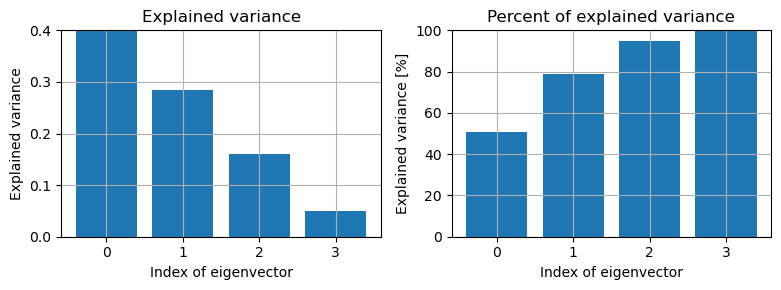

In [68]:
# global PCA
fused_pca, scaler = compute_pca(fused_ds_reduced)
display_pca_variance(fused_pca)

In [69]:
scaled_ds = {}
for period_name in period_names:
    print(f"Computing PCA for period: {period_name}")
    scaled_ds[period_name] = scale_with_pca(reduced_ds[period_name], scaler, fused_pca)
    

Computing PCA for period: 2011_2014
Computing PCA for period: 2021_2030
Computing PCA for period: 2031_2040
Computing PCA for period: 2041_2050


In [70]:
def find_nb_min_components_for_variance(pca, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = np.sum(cummulated_variance < target_explained_variance)

    return min_index + 1

def project_data_pca(df_scaled, pca, n_components, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = n_components - 1

    print('The projection will try to keep', target_explained_variance*100, '% of the variance')
    print(min_index + 1, 'eigenvectors are needed')
    print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

    projected = PCA(n_components = min_index+1).fit_transform(df_scaled)

    return projected

def add_metadata_to_df(df, metadata):
    return pd.concat([metadata, df], axis=1)

In [71]:
target_explained_variance = 0.9
min_nb_components = find_nb_min_components_for_variance(fused_pca, target_explained_variance=target_explained_variance)

projected_ds = {}

for period_name in period_names:
    print(f"Projecting data for period: {period_name}")
    projected_ds[period_name] = scaled_ds[period_name][:, :min_nb_components]


Projecting data for period: 2011_2014
Projecting data for period: 2021_2030
Projecting data for period: 2031_2040
Projecting data for period: 2041_2050


In [72]:
metadata = get_metadata(loaded_datasets['2021_2030'])
final_ds = {}

for period_name in period_names:
    final_ds[period_name] = add_metadata_to_df(
        pd.DataFrame(projected_ds[period_name]),
        metadata
    )
    print(f"Final dataset for period {period_name} has shape: {final_ds[period_name].shape}")

Final dataset for period 2011_2014 has shape: (56, 6)
Final dataset for period 2021_2030 has shape: (56, 6)
Final dataset for period 2031_2040 has shape: (56, 6)
Final dataset for period 2041_2050 has shape: (56, 6)


In [73]:
final_70 = final_ds['2021_2030']
final_70.head()

,city,latitude,longitude,0,1,2
0,Amsterdam,52.25,5.00,-0.040527,0.960333,-0.026084
1,Andorra la Vella,42.50,1.50,0.695121,-1.157947,-0.395538
2,Ankara,40.00,32.75,-0.539474,-0.755869,-0.993493
3,Athens,38.00,23.75,-1.919755,-0.575292,0.233793
4,Belgrade,44.75,20.50,-0.518300,-0.438467,0.028324


In [74]:
for period_name in period_names:
    display(final_ds[period_name].head())

,city,latitude,longitude,0,1,2
0,Amsterdam,52.25,5.00,0.017813,1.124944,0.193391
1,Andorra la Vella,42.50,1.50,0.589977,-1.131962,-0.483362
2,Ankara,40.00,32.75,-0.751929,-0.702986,-1.084100
3,Athens,38.00,23.75,-1.990248,-0.613376,0.100363
4,Belgrade,44.75,20.50,-0.758671,-0.374346,-0.077193


,city,latitude,longitude,0,1,2
0,Amsterdam,52.25,5.00,-0.040527,0.960333,-0.026084
1,Andorra la Vella,42.50,1.50,0.695121,-1.157947,-0.395538
2,Ankara,40.00,32.75,-0.539474,-0.755869,-0.993493
3,Athens,38.00,23.75,-1.919755,-0.575292,0.233793
4,Belgrade,44.75,20.50,-0.518300,-0.438467,0.028324


,city,latitude,longitude,0,1,2
0,Amsterdam,52.25,5.00,-0.191898,1.058416,0.138075
1,Andorra la Vella,42.50,1.50,0.374952,-1.136136,-0.359919
2,Ankara,40.00,32.75,-0.768704,-0.770036,-0.947022
3,Athens,38.00,23.75,-2.116605,-0.661147,0.189807
4,Belgrade,44.75,20.50,-0.995730,-0.414730,0.052455


,city,latitude,longitude,0,1,2
0,Amsterdam,52.25,5.00,-0.189558,1.116282,0.350148
1,Andorra la Vella,42.50,1.50,0.242243,-1.171993,-0.165340
2,Ankara,40.00,32.75,-0.962617,-0.780490,-0.709604
3,Athens,38.00,23.75,-2.310024,-0.672274,0.369286
4,Belgrade,44.75,20.50,-1.184497,-0.437397,0.261737


## Find closest city

In [75]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis
from scipy.stats import wasserstein_distance

In [76]:
def get_distance_matrix(ds_current, ds_target, distance_metric='euclidean'):
    
    distances = [[0 for _ in range(ds_target.shape[0])] for _ in range(ds_current.shape[0])]

    for i in range(ds_current.shape[0]):
        for j in range(ds_target.shape[0]):
            if distance_metric == 'euclidean':
                distances[i][j] = euclidean_distances([ds_current.iloc[i, 3:]], [ds_target.iloc[j, 3:]])[0][0]
            elif distance_metric == 'mahalanobis':
                VI = np.linalg.inv(np.cov(ds_target.iloc[:, 3:].T))
                distances[i][j] = mahalanobis(ds_current.iloc[i, 3:], ds_target.iloc[j, 3:], VI)           
            else:
                raise ValueError("Unsupported distance metric. Use 'euclidean' or 'mahalanobis'.")
    
    return distances

In [77]:
def compute_distance_threshold(distance_matrix, percentile=0.9):
    """
    Compute a global distance threshold from the upper triangular
    part (diagonal included) of a distance matrix.
    """
    # indices de la matrice triangulaire supérieure (diagonale comprise)
    triu_idx = np.triu_indices(distance_matrix.shape[0], k=0)
    
    distances = distance_matrix[triu_idx]
    
    return np.quantile(distances, percentile)

In [78]:
import numpy as np

def find_closest_city(
    target_ds,
    current_ds,
    current_city,
    distance_matrix,
    threshold=0.9
):
    """
    Distances above the percentile defined by `threshold`
    (computed on all elements of the distance matrix)
    are considered too far.
    """

    distance_matrix = np.asarray(distance_matrix)

    # Find index of the city in current_ds
    mask = (
        (current_ds['latitude'] == current_city[0]) &
        (current_ds['longitude'] == current_city[1])
    )

    if not mask.any():
        raise ValueError(
            f"City at coordinates {current_city} not found in the current dataset."
        )

    current_index = current_ds[mask].index[0]

    # Percentile threshold from full distribution
    all_distances = distance_matrix.flatten()
    distance_threshold = np.quantile(all_distances, threshold)

    # Closest city
    distances = distance_matrix[current_index]
    closest_index = np.argmin(distances)
    closest_distance = distances[closest_index]

    if closest_distance > distance_threshold:
        return "New Climate", closest_distance

    closest_city = target_ds.iloc[closest_index]['city']
    return closest_city, closest_distance


In [79]:
bern = (47, 7.5)

In [80]:
# Calculate distance matrix: future climate (rows) vs current climate (columns)
# For each city's future climate (2050), find which current city (2020) has that climate today
euclidean_distances_matrix = get_distance_matrix(final_ds['2041_2050'], final_ds['2011_2014'], distance_metric='euclidean')
find_closest_city(final_ds['2011_2014'], final_ds['2041_2050'], bern, euclidean_distances_matrix)

('Ljubljana', np.float64(0.5201960525581032))

In [81]:
metadata = get_metadata(loaded_datasets['2011_2014'])
names = loaded_datasets['2011_2014'][['city']]
cities = pd.DataFrame(columns=['city_2020', 'city_analog_today'])

distances = []

# For each city: find which city has TODAY (2020) the climate that this city WILL HAVE (2050)
for city, lat, long in metadata.values:
    # Find the city's future climate (2050) and match it with current climates (2020)
    closest_city = find_closest_city(
        final_ds['2011_2014'],   # target: search in current climates (2020)
        final_ds['2041_2050'],   # current: the city's future climate (2050)
        (lat, long), 
        euclidean_distances_matrix
    )
    new_row = pd.DataFrame([[city, closest_city[0]]], 
                          columns=['city_2020', 'city_analog_today'])
    cities = pd.concat([cities, new_row], ignore_index=True)

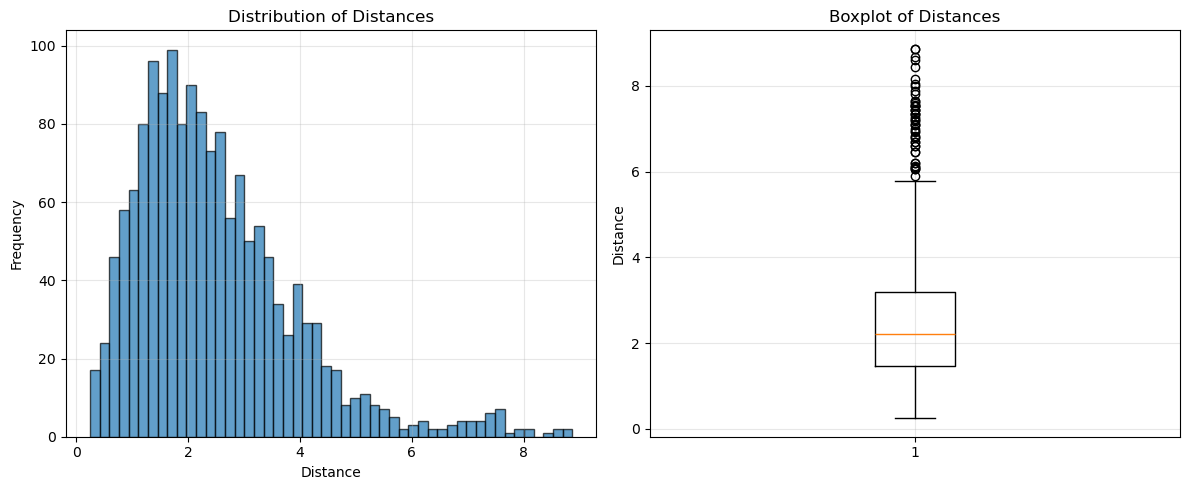

Total distances calculated: 1540
Mean distance: 2.4900
Median distance: 2.2108
Std deviation: 1.4352
Min distance: 0.2488
Max distance: 8.8653


In [82]:
# Extract unique distances from upper triangle of the distance matrix (excluding diagonal)
distances_array = np.array(euclidean_distances_matrix)
distances = distances_array[np.triu_indices_from(distances_array, k=1)]

# Plot distribution of distances
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(distances, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(distances)
plt.ylabel('Distance')
plt.title('Boxplot of Distances')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total distances calculated: {len(distances)}")
print(f"Mean distance: {np.mean(distances):.4f}")
print(f"Median distance: {np.median(distances):.4f}")
print(f"Std deviation: {np.std(distances):.4f}")
print(f"Min distance: {np.min(distances):.4f}")
print(f"Max distance: {np.max(distances):.4f}")


In [83]:
display(cities)

,city_2020,city_analog_today
0,Amsterdam,Amsterdam
1,Andorra la Vella,Sofia
2,Ankara,Ankara
3,Athens,Athens
4,Belgrade,San Marino
5,Berlin,Paris
6,Bern,Ljubljana
7,Bratislava,Belgrade
8,Brussels,Brussels
9,Bucharest,San Marino


In [84]:
# calculate the percentage of cities that remained the same
same_city_count = np.sum(cities['city_2020'] == cities['city_analog_today'])
total_cities = len(cities)

f"Percentage of cities that remained the same: {same_city_count / total_cities * 100:.2f}%"

'Percentage of cities that remained the same: 53.57%'